
# 🧠 Quora Duplicate Question Detection using Bag-of-Words

In this project, we work on detecting whether two questions from Quora are duplicates using natural language processing techniques.
We focus on preprocessing, feature engineering, and traditional ML classifiers.

---



## 📊 Initial Exploration

Let's understand the structure of the dataset, class distribution, and unique questions.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
#performing EDA

data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
data.shape

(404290, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
data.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
298251,298251,419797,420723,Is mercury a radioactive element?,Nuclear Physics: Why does radioactive decay ta...,0
89966,89966,151055,8981,Do spirts or ghosts exist?,Does ghost really exist?,1
164501,164501,255594,255595,How is the service quality and plans of Tata S...,Countries where work is allowed along with stu...,0
371002,371002,501592,501593,Which are the companies who are hiring Java fr...,What is a list of startup embedded companies i...,0
102002,102002,168855,103164,How much scholarship can I get for applying ms...,Can I get scholarship through gre?,0
14745,14745,28221,28222,What are the Las Vegas odds that if Trump is e...,Will Donald Trump defeat his opponent in the g...,0
162862,162862,107550,203219,Why do colors look more red in one eye and mor...,Why would one eye see different colors than th...,1
329089,329089,61682,455715,Which are the most underrated Bollywood actors...,Which Bollywood actors are underrated?,1
206440,206440,239988,309853,Are my bitcoins safe in my blockchain.info wal...,Is the use of Bitcoin's blockchain as a proof ...,0
147839,147839,233228,100580,Which drugs can make sex more exciting?,Why does sex feel good?,0


In [ ]:
data.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [ ]:
data.duplicated().sum()

np.int64(0)

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: ylabel='count'>

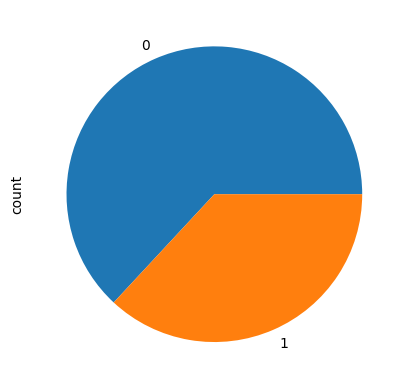

In [ ]:
print(data['is_duplicate'].value_counts())
print(data['is_duplicate'].value_counts()/data['is_duplicate'].count()*100)
data['is_duplicate'].value_counts().plot(kind='pie')

In [ ]:
# Repeated questions

# Combine the 'qid1' and 'qid2' columns into a single list, and convert it into a Pandas Series
qid = pd.Series(data['qid1'].tolist() + data['qid2'].tolist())

# Print the number of unique question IDs
print('Number of unique questions:', np.unique(qid).shape[0])

# Count how many times each question ID appears and find those that appear more than once
x = qid.value_counts() > 1

# Print the number of question IDs that are repeated
print('Number of questions getting repeated:', x[x].shape[0])


Number of unique questions: 537933
Number of questions getting repeated: 111780


In [ ]:
""" qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
Combines all question IDs from both qid1 and qid2 columns.

tolist() converts each column into a list, and the two lists are concatenated.

pd.Series(...) creates a single Series of all question IDs involved in the dataset.

🔹 np.unique(qid).shape[0]
np.unique(qid) gives the unique question IDs.

.shape[0] returns the count of those unique IDs.

🔹 qid.value_counts() > 1
value_counts() returns how many times each question ID appears.

> 1 creates a Boolean Series, where True means the question is repeated (appears more than once).

🔹 x[x].shape[0]
x[x] filters only the True values from the Boolean Series — i.e., repeated questions.

.shape[0] counts how many question IDs are repeated. """

''

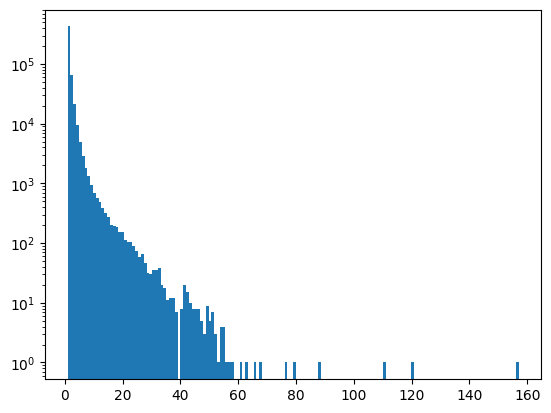

In [ ]:

plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')

plt.show()

In [ ]:
# here i will use random forest and XGBoost classifier to check without performing and feature engineering how well the model will perform


In [ ]:
new_data =  data.sample(30000)

In [ ]:
new_data.shape

(30000, 6)

In [ ]:
new_data.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [ ]:
# the number of dublicate entery
new_data.duplicated().sum()

np.int64(0)

In [ ]:
questions = new_data[['question1','question2']]
questions.head()

,question1,question2
152534,What are common violations of journalistic eth...,What is the ethical position of fake news?
42168,How did Roman Saini study History? Notes or re...,How did Roman Saini make notes from the newspa...
68191,What are the best tools to optimize an AdWords...,Do you build Adwords campaigns in Excel?
49286,What's the best rooftop bar in the Mission?,What are good bars in the Mission?
362769,Why did she stop texting me?,Why has she stopped texting me first?


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3000)
questions = list(new_data['question1'])+list(new_data['question2'])
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
q1_arr.shape

(30000, 3000)

In [ ]:
q2_arr.shape

(30000, 3000)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr,index = new_data.index)
temp_df2 = pd.DataFrame(q2_arr,index = new_data.index)
temp_df = pd.concat([temp_df1,temp_df2],axis = 1)
temp_df.shape

(30000, 6000)

In [ ]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
80206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
302607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
381903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
71510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
330421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
358644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#adding new column weather the data is dublicate or not

temp_df['is_duplicate'] = new_data['is_duplicate']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(temp_df.iloc[: , 0:-1].values,temp_df.iloc[: , -1].values, test_size = 0.2,random_state = 1)


In [ ]:
x_train.shape


(24000, 6000)

In [ ]:
x_test.shape

(6000, 6000)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rm = RandomForestClassifier()
rm.fit(x_train,y_train)
y_predict = rm.predict(x_test)
accuracy_score(y_test,y_predict)

0.7398333333333333

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train,y_train)
y_predictxg = xg.predict(x_test)
accuracy_score(y_test,y_predictxg)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.7/291.7 MB 3.7 MB/s eta 0:00:00


0.7228333333333333

In [ ]:
#adding some extra columns in the data
new_data['q1_length'] = new_data['question1'].str.len()
new_data['q2_length'] = new_data['question2'].str.len()



In [ ]:
new_data

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length
80206,80206,27201,136401,"What is the origin of the phrase ""olly olly ox...","What is the origin of the phrase ""bitches be c...",0,55,52
302607,302607,425612,5340,Is excessive masturbation dangerous?,What are the side effects (positive and negati...,0,36,75
381903,381903,513692,513693,What is the solution to the below centre of ma...,Do objects in zero gravity rotate around their...,0,57,62
71510,71510,123043,123044,What is the cost of living (monthly or yearly)...,What is the cost of living (monthly or yearly)...,0,102,86
114248,114248,186527,186528,What are some ways of watching YouTube Music A...,Where can I watch the YouTube Music Awards?,1,52,43
...,...,...,...,...,...,...,...,...
321863,321863,447620,447621,What are some good captions for your own pictu...,Will anyone find the purpose of our lives?,0,50,42
159487,159487,84787,248967,What is hollaween walk?,Hollaween ghost walk?,1,23,21
330421,330421,166526,19390,Which is the worst kollywood movie you have ev...,What are the worst movies ever made?,0,62,36
358644,358644,488173,335580,What is a niche?,"What is your ""niche"" and why?",0,16,29


In [ ]:
new_data['q1_word'] = new_data['question1'].apply(lambda raw : len(raw.split()))
new_data['q2_word'] = new_data['question2'].apply(lambda raw : len(raw.split()))

In [ ]:
new_data

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_word,q2_word
80206,80206,27201,136401,"What is the origin of the phrase ""olly olly ox...","What is the origin of the phrase ""bitches be c...",0,55,52,11,10
302607,302607,425612,5340,Is excessive masturbation dangerous?,What are the side effects (positive and negati...,0,36,75,4,12
381903,381903,513692,513693,What is the solution to the below centre of ma...,Do objects in zero gravity rotate around their...,0,57,62,11,11
71510,71510,123043,123044,What is the cost of living (monthly or yearly)...,What is the cost of living (monthly or yearly)...,0,102,86,18,16
114248,114248,186527,186528,What are some ways of watching YouTube Music A...,Where can I watch the YouTube Music Awards?,1,52,43,9,8
...,...,...,...,...,...,...,...,...,...,...
321863,321863,447620,447621,What are some good captions for your own pictu...,Will anyone find the purpose of our lives?,0,50,42,9,8
159487,159487,84787,248967,What is hollaween walk?,Hollaween ghost walk?,1,23,21,4,3
330421,330421,166526,19390,Which is the worst kollywood movie you have ev...,What are the worst movies ever made?,0,62,36,12,7
358644,358644,488173,335580,What is a niche?,"What is your ""niche"" and why?",0,16,29,4,6


In [ ]:
new_data['question1'].iloc[0]

'What is the origin of the phrase "olly olly oxen free"?'


## 🧼 Text Preprocessing

Steps include:
- Lowercasing
- Removing punctuation, HTML tags, and stopwords
- Optional: lemmatization/stemming (can be added)


In [ ]:
def common_word(raw):
  word1 = set(map(lambda word : word.lower().strip(), raw['question1'].split(" ")))
  word2 = set(map(lambda word : word.lower().strip(), raw['question2'].split(" ")))
  return len(word1 & word2)

In [ ]:
new_data['word_common'] = new_data.apply(common_word , axis = 1)

In [ ]:
new_data

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_word,q2_word,word_common,word_total
80206,80206,27201,136401,"What is the origin of the phrase ""olly olly ox...","What is the origin of the phrase ""bitches be c...",0,55,52,11,10,6,19
302607,302607,425612,5340,Is excessive masturbation dangerous?,What are the side effects (positive and negati...,0,36,75,4,12,0,16
381903,381903,513692,513693,What is the solution to the below centre of ma...,Do objects in zero gravity rotate around their...,0,57,62,11,11,2,21
71510,71510,123043,123044,What is the cost of living (monthly or yearly)...,What is the cost of living (monthly or yearly)...,0,102,86,18,16,15,34
114248,114248,186527,186528,What are some ways of watching YouTube Music A...,Where can I watch the YouTube Music Awards?,1,52,43,9,8,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...
321863,321863,447620,447621,What are some good captions for your own pictu...,Will anyone find the purpose of our lives?,0,50,42,9,8,0,17
159487,159487,84787,248967,What is hollaween walk?,Hollaween ghost walk?,1,23,21,4,3,2,7
330421,330421,166526,19390,Which is the worst kollywood movie you have ev...,What are the worst movies ever made?,0,62,36,12,7,3,19
358644,358644,488173,335580,What is a niche?,"What is your ""niche"" and why?",0,16,29,4,6,2,10


In [ ]:
#adding total words
def total_word(raw):
  word1 = set(map(lambda word : word.lower().strip(), raw['question1'].split(" ")))
  word2 = set(map(lambda word : word.lower().strip(), raw['question2'].split(" ")))
  return len(word1) + len(word2)

In [ ]:
new_data['word_total'] = new_data.apply(total_word , axis = 1)

In [ ]:
new_data['word_share'] = round(new_data['word_common']/new_data['word_total'] , 2 )

KeyError: 'word_common'

In [ ]:
new_data

NameError: name 'new_data' is not defined

minimum number of words in question 1 1
maximum number of words in question 1 345
average number of words in question 1 59


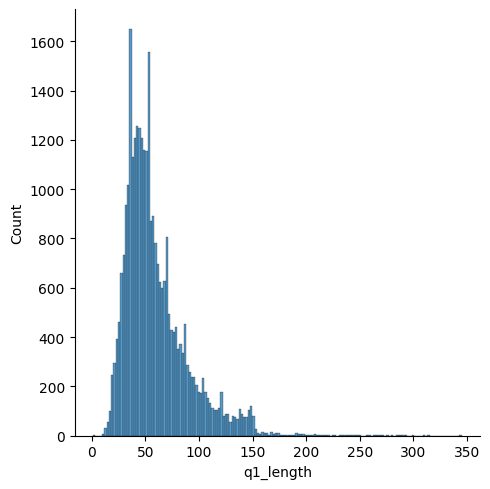

In [ ]:
sns.displot(new_data['q1_length'])
print('minimum number of words in question 1',new_data['q1_length'].min())
print('maximum number of words in question 1',new_data['q1_length'].max())
print('average number of words in question 1',int(new_data['q1_length'].mean()))

minimum number of words in question 1 1
maximum number of words in question 1 1169
average number of words in question 1 60


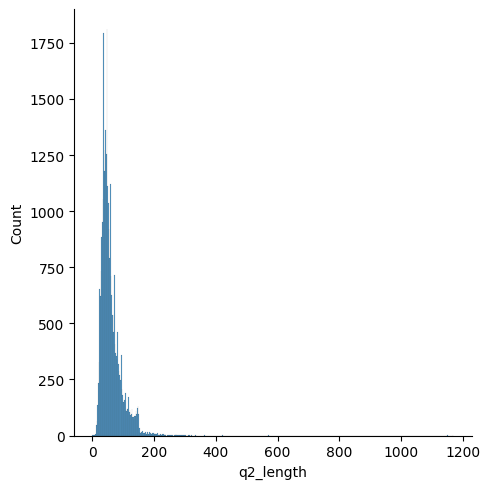

In [ ]:
sns.displot(new_data['q2_length'])
print('minimum number of words in question 1',new_data['q2_length'].min())
print('maximum number of words in question 1',new_data['q2_length'].max())
print('average number of words in question 1',int(new_data['q2_length'].mean()))

minimum number of words in question 1 1
maximum number of words in question 1 60
average number of words in question 1 10


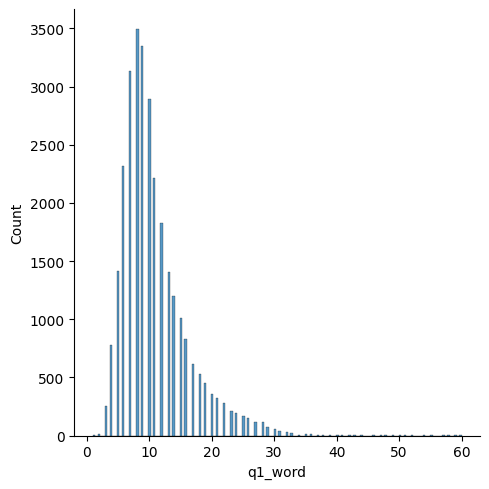

In [ ]:
sns.displot(new_data['q1_word'])
print('minimum number of words in question 1',new_data['q1_word'].min())
print('maximum number of words in question 1',new_data['q1_word'].max())
print('average number of words in question 1',int(new_data['q1_word'].mean()))

minimum number of words in question 1 1
maximum number of words in question 1 237
average number of words in question 1 11


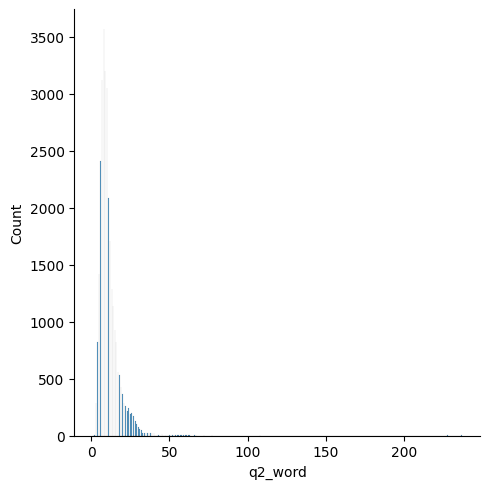

In [ ]:
sns.displot(new_data['q2_word'])
print('minimum number of words in question 1',new_data['q2_word'].min())
print('maximum number of words in question 1',new_data['q2_word'].max())
print('average number of words in question 1',int(new_data['q2_word'].mean()))

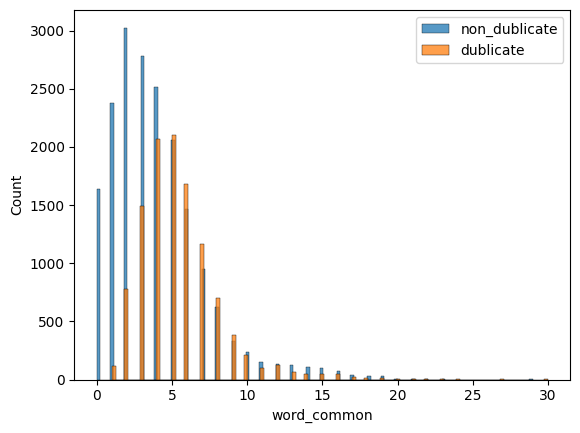

In [ ]:
sns.histplot(new_data[new_data['is_duplicate']==0]["word_common"] , label = "non_dublicate")
sns.histplot(new_data[new_data['is_duplicate']==1]["word_common"] , label = "dublicate")
plt.legend()
plt.show()

# to daw the graph in a same spot use hist plot
# if in the aqestion 1 and question 2 has less than 4 common words the they have very low prob of being dublicate

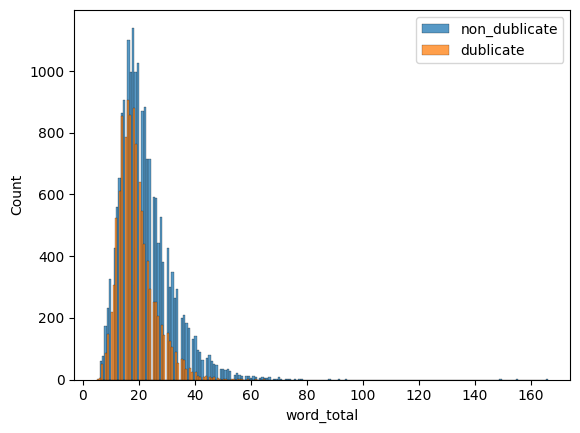

In [ ]:
sns.histplot(new_data[new_data['is_duplicate']==0]["word_total"] , label = "non_dublicate")
sns.histplot(new_data[new_data['is_duplicate']==1]["word_total"] , label = "dublicate")
plt.legend()
plt.show()


#if total number of words are greater than 26 then there are high pron that the questions arnt dublicate

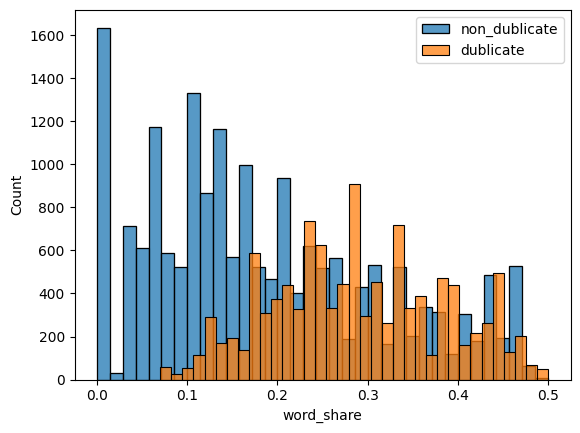

In [ ]:
sns.histplot(new_data[new_data['is_duplicate']==0]["word_share"] , label = "non_dublicate")
sns.histplot(new_data[new_data['is_duplicate']==1]["word_share"] , label = "dublicate")
plt.legend()
plt.show()

# <.2 then non dublicate

In [ ]:
sort_df = new_data[['question1' , 'question2']]
sort_df

,question1,question2
80206,"What is the origin of the phrase ""olly olly ox...","What is the origin of the phrase ""bitches be c..."
302607,Is excessive masturbation dangerous?,What are the side effects (positive and negati...
381903,What is the solution to the below centre of ma...,Do objects in zero gravity rotate around their...
71510,What is the cost of living (monthly or yearly)...,What is the cost of living (monthly or yearly)...
114248,What are some ways of watching YouTube Music A...,Where can I watch the YouTube Music Awards?
...,...,...
321863,What are some good captions for your own pictu...,Will anyone find the purpose of our lives?
159487,What is hollaween walk?,Hollaween ghost walk?
330421,Which is the worst kollywood movie you have ev...,What are the worst movies ever made?
358644,What is a niche?,"What is your ""niche"" and why?"



## 🧰 Feature Engineering

We build two kinds of features:
1. **Basic Bag-of-Words** representations
2. **Advanced handcrafted features** like:
    - Common word counts
    - Stopword ratios
    - Length difference
    - Fuzzy matching ratios

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3000)
questions = list(sort_df['question1'])+list(sort_df['question2'])
p1_arr,p2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_pdf1 = pd.DataFrame(p1_arr,index = new_data.index)
temp_pdf2 = pd.DataFrame(p2_arr,index = new_data.index)
temp_pdf = pd.concat([temp_pdf1,temp_pdf2],axis = 1)
temp_pdf.shape

(30000, 6000)

In [ ]:
secondary_df = new_data.drop(columns = ['id' , 'qid1' ,	'qid2',	'question1'	,'question2'])

In [ ]:
final_df = pd.concat([secondary_df,temp_pdf] , axis = 1)
final_df.shape

(30000, 6008)

In [ ]:
final_df

,is_duplicate,q1_length,q2_length,q1_word,q2_word,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
80206,0,55,52,11,10,6,19,0.32,0,0,...,0,0,0,0,0,0,0,0,0,0
302607,0,36,75,4,12,0,16,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
381903,0,57,62,11,11,2,21,0.10,0,0,...,0,0,0,0,0,0,0,0,1,0
71510,0,102,86,18,16,15,34,0.44,0,0,...,0,0,0,0,0,0,0,0,0,0
114248,1,52,43,9,8,3,17,0.18,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321863,0,50,42,9,8,0,17,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
159487,1,23,21,4,3,2,7,0.29,0,0,...,0,0,0,0,0,0,0,0,0,0
330421,0,62,36,12,7,3,19,0.16,0,0,...,0,0,0,0,0,0,0,0,0,0
358644,0,16,29,4,6,2,10,0.20,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(final_df.iloc[: , 1:].values,final_df.iloc[: ,0].values, test_size = 0.2,random_state = 1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rma = RandomForestClassifier()
rma.fit(x_train,y_train)
y_predict = rma.predict(x_test)
accuracy_score(y_test,y_predict)

0.7711666666666667

In [ ]:
from xgboost import XGBClassifier
xga = XGBClassifier()
xga.fit(x_train,y_train)
y_predictxg = xga.predict(x_test)
accuracy_score(y_test,y_predictxg)

0.7721666666666667

## Advanced Features

### 1. Token Features
- **cwc_min**: This is the ratio of the number of common words to the length of the smaller question
- **cwc_max**: This is the ratio of the number of common words to the length of the larger question
- **csc_min**: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
- **csc_max**: This is the ratio of the number of common stop words to the larger stop word count among the two questions
- **ctc_min**: This is the ratio of the number of common tokens to the smaller token count among the two questions
- **ctc_max**: This is the ratio of the number of common tokens to the larger token count among the two questions
- **last_word_eq**: 1 if the last word in the two questions is same, 0 otherwise
- **first_word_eq**: 1 if the first word in the two questions is same, 0 otherwise

### 2. Length Based Features
- **mean_len**: Mean of the length of the two questions (number of words)
- **abs_len_diff**: Absolute difference between the length of the two questions (number of words)
- **longest_substr_ratio**: Ratio of the length of the longest substring among the two questions to the length of the smaller question

### 3. Fuzzy Features
- **fuzz_ratio**: fuzz_ratio score from fuzzywuzzy
- **fuzz_partial_ratio**: fuzz_partial_ratio from fuzzywuzzy
- **token_sort_ratio**: token_sort_ratio from fuzzywuzzy
- **token_set_ratio**: token_set_ratio from fuzzywuzzy

In [ ]:
import re
#advance features
def preprocessing(q):
  q = q.lower().strip()

  # wrod preprocessing
  q = q.replace("$",'dollar')
  q = q.replace('₹' , 'rupees')
  q = q.replace('@', 'at')
  q = q.replace('?' , 'question')
  q = q.replace('%' , 'percent')
  q = q.replace('€' , ' euro')

  # the word [math] appeared liked that inn the dta set and it has no meaning in thw data
  q = q.replace('[math]' , '')

   # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
  q = q.replace(',000,000,000', 'b ')  # millions im m
  q = q.replace(',000,000', 'm ')  #billion into b
  q = q.replace(',000', 'k ') # thousand into k
  q =q.replace('00' , 'h') # hundred to h
  q = re.sub(r'([0-9]+)000000000', r'\1b', q)
  q = re.sub(r'([0-9]+)000000', r'\1m', q)
  q = re.sub(r'([0-9]+)000', r'\1k', q)
  q = re.sub(r'([0-9]+)00' , r'\1h' ,q)

  # Decontracting words
  # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
  # https://stackoverflow.com/a/19794953
  contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

  q_contracted = []
  for word in q.split():
    if word in contractions:
      word = contractions[word]

    q_contracted.append(word)

  q = " ".join(q_contracted)
  q = q.replace("'ve" , "have")
  q = q.replace("n't" , "not")
  q = q.replace("'re" , "are")
  return q






In [ ]:
preprocessing("I've already! wasn't <b>done</b>?")

'i have already! was not <b>done</b>question'

In [ ]:
new_data['question1'] = new_data['question1'].apply(preprocessing)
new_data['question2'] = new_data['question2'].apply(preprocessing)

In [ ]:
new_data.sample(100)

,id,qid1,qid2,question1,question2,is_duplicate
279032,279032,387718,398393,what is the best pomade for thick hairquestion,what is the best shampoo for thick hairquestion,0
314407,314407,121331,10235,how should india respond to pakistan on recent...,how india can respond to the uri terror attack...,1
125994,125994,203164,203165,how do i prepare for the new satquestion,how do i self study for the new satquestion,0
234283,234283,344742,344743,how do i avoid social networkquestion,how should we avoid social networkquestion,1
369772,369772,11638,37728,what is the best programming language for begi...,what is the best programming/coding language t...,1
...,...,...,...,...,...,...
235900,235900,346713,280288,how did monkeys get to south america from afri...,how did monkeys get to south america from afri...,1
321552,321552,169735,65637,what is best way to learn english speakingques...,how can i get fluency in english speakingquestion,1
269207,269207,386877,386878,does throwing up help you lose weightquestion,what happens when you throw up to lose weightq...,1
402041,402041,535487,87458,when will india get the fgfa and amca fighter ...,is india developing any 5th generation fighter...,0


In [ ]:
new_data['q1_len'] = new_data['question1'].str.len()
new_data['q2_len'] = new_data['question2'].str.len()

In [ ]:
new_data['q1_num_words'] = new_data['question1'].apply(lambda row: len(row.split(" ")))
new_data['q2_num_words'] = new_data['question2'].apply(lambda row: len(row.split(" ")))
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,word_total,q1_len,q2_len,q1_num_words,q2_num_words
192919,192919,292694,290351,how can i improve my running speedquestion,how do i increase my running speedquestion,1,14,42,42,7,7
134970,134970,215632,215633,"why do women ""have to"" wear makeup but men don...",why do some women not wear makeupquestion,0,17,56,41,10,7
74518,74518,127689,127690,what are the differences between each type of ...,"is there any difference between heroin, cocain...",0,26,66,107,10,16
302506,302506,425517,425518,what is the salary of a 'startup liaison' for ...,what is a fair startup salaryquestion,0,16,63,37,10,6
341114,341114,8484,19375,when will apple release the next generation of...,when will apple release the new macbook pro in...,1,23,92,59,13,10


In [ ]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [ ]:
new_data['word_common'] = new_data.apply(common_words, axis=1)
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,word_total,q1_len,q2_len,q1_num_words,q2_num_words,word_common
192919,192919,292694,290351,how can i improve my running speedquestion,how do i increase my running speedquestion,1,14,42,42,7,7,5
134970,134970,215632,215633,"why do women ""have to"" wear makeup but men don...",why do some women not wear makeupquestion,0,17,56,41,10,7,4
74518,74518,127689,127690,what are the differences between each type of ...,"is there any difference between heroin, cocain...",0,26,66,107,10,16,3
302506,302506,425517,425518,what is the salary of a 'startup liaison' for ...,what is a fair startup salaryquestion,0,16,63,37,10,6,3
341114,341114,8484,19375,when will apple release the next generation of...,when will apple release the new macbook pro in...,1,23,92,59,13,10,6


In [ ]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [ ]:
new_data['word_total'] = new_data.apply(total_words, axis=1)
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,word_total,q1_len,q2_len,q1_num_words,q2_num_words,word_common
192919,192919,292694,290351,how can i improve my running speedquestion,how do i increase my running speedquestion,1,14,42,42,7,7,5
134970,134970,215632,215633,"why do women ""have to"" wear makeup but men don...",why do some women not wear makeupquestion,0,17,56,41,10,7,4
74518,74518,127689,127690,what are the differences between each type of ...,"is there any difference between heroin, cocain...",0,26,66,107,10,16,3
302506,302506,425517,425518,what is the salary of a 'startup liaison' for ...,what is a fair startup salaryquestion,0,16,63,37,10,6,3
341114,341114,8484,19375,when will apple release the next generation of...,when will apple release the new macbook pro in...,1,23,92,59,13,10,6


In [ ]:
new_data['word_share'] = round(new_data['word_common']/new_data['word_total'],2)
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,word_total,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_share
192919,192919,292694,290351,how can i improve my running speedquestion,how do i increase my running speedquestion,1,14,42,42,7,7,5,0.36
134970,134970,215632,215633,"why do women ""have to"" wear makeup but men don...",why do some women not wear makeupquestion,0,17,56,41,10,7,4,0.24
74518,74518,127689,127690,what are the differences between each type of ...,"is there any difference between heroin, cocain...",0,26,66,107,10,16,3,0.12
302506,302506,425517,425518,what is the salary of a 'startup liaison' for ...,what is a fair startup salaryquestion,0,16,63,37,10,6,3,0.19
341114,341114,8484,19375,when will apple release the next generation of...,when will apple release the new macbook pro in...,1,23,92,59,13,10,6,0.26


In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')


In [ ]:

# Advamce feature engineering
from nltk.corpus import stopwords

def token_features_extraction(row):
  STOP_WORDS = stopwords.words("english")

  q1 = row['question1']
  q2 = row['question2']

  q1_token = q1.split()
  q2_token = q2.split()

  #token feature
  token_feature = [0.0]*8

  safe_deviser = 0.0001

  if len(q1_token)== 0 or len(q2_token) == 0:
    return token_feature

  # collecting common words
  q1_word = set([word for word in q1_token if word not in STOP_WORDS])
  q2_word = set([word for word in q2_token if word not in STOP_WORDS])

  # collect stop words
  q1_stop = set([word for word in q1_token if word  in STOP_WORDS])
  q2_stop = set([word for word in q1_token if word  in STOP_WORDS])

  #get common word count
  common_word_count = len(q1_word.intersection(q2_word))

  # get common stop word count

  common_stop_word_count = len(q1_stop.intersection(q2_stop))

  # get common tokens
  common_token_count = len(set(q1_token).intersection(set(q2_token)))  # interaction is a function of set

  token_feature[0] = common_word_count / (min(len(q1_word), len(q2_word)) + safe_deviser)
  token_feature[1] = common_word_count / (max(len(q1_word), len(q2_word)) + safe_deviser)
  token_feature[2] = common_stop_word_count / (min(len(q1_stop), len(q2_stop)) + safe_deviser)
  token_feature[3] = common_stop_word_count / (max(len(q1_stop), len(q2_stop)) + safe_deviser)
  token_feature[4] = common_token_count / (min(len(q1_token), len(q2_token)) + safe_deviser)
  token_feature[5] = common_token_count / (max(len(q1_token), len(q2_token)) + safe_deviser)


  #checking weather the last word are same or not
  token_feature[6] = int(q1_token[-1] == q2_token[-1])

  #checking weather the first word are same or not
  token_feature[7] = int(q1_token[0] == q2_token[0])

  return token_feature

In [ ]:
token_feature = new_data.apply(token_features_extraction , axis = 1)

new_data['cwc_min']  = list(map(lambda x : x[0] , token_feature))
new_data['cwc_max']  = list(map(lambda x : x[1] , token_feature))
new_data['csc_min']  = list(map(lambda x : x[2] , token_feature))
new_data['csc_max']  = list(map(lambda x : x[3] , token_feature))
new_data['ctc_min']  = list(map(lambda x : x[4] , token_feature))
new_data['ctc_max']  = list(map(lambda x : x[5] , token_feature))
new_data['last_word_eq'] = list(map(lambda x : x[6] , token_feature))
new_data['first_word_eq'] = list(map(lambda x : x[7] , token_feature))

In [ ]:
new_data

,id,qid1,qid2,question1,question2,is_duplicate,word_total,q1_len,q2_len,q1_num_words,...,word_common,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
192919,192919,292694,290351,how can i improve my running speedquestion,how do i increase my running speedquestion,1,14,42,42,7,...,5,0.36,0.666644,0.666644,0.999975,0.999975,0.714276,0.714276,1,1
134970,134970,215632,215633,"why do women ""have to"" wear makeup but men don...",why do some women not wear makeupquestion,0,17,56,41,10,...,4,0.24,0.666644,0.285710,0.999967,0.999967,0.571420,0.399996,0,1
74518,74518,127689,127690,what are the differences between each type of ...,"is there any difference between heroin, cocain...",0,26,66,107,10,...,3,0.12,0.000000,0.000000,0.999983,0.999983,0.299997,0.187499,0,0
302506,302506,425517,425518,what is the salary of a 'startup liaison' for ...,what is a fair startup salaryquestion,0,16,63,37,10,...,3,0.19,0.000000,0.000000,0.999983,0.999983,0.499992,0.299997,0,1
341114,341114,8484,19375,when will apple release the next generation of...,when will apple release the new macbook pro in...,1,23,92,59,13,...,6,0.26,0.499992,0.374995,0.999980,0.999980,0.599994,0.461535,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398780,398780,532025,532026,how large typically is the entourage that acco...,how large is the u.s presidents entourage when...,1,26,97,85,14,...,6,0.23,0.428565,0.374995,0.999980,0.999980,0.461535,0.428568,0,1
249074,249074,287486,345344,what is your favorite hollywood movie which re...,which is the best hollywood movie which releas...,0,23,82,78,12,...,9,0.39,0.833319,0.833319,0.999983,0.999983,0.749994,0.749994,1,0
393079,393079,156339,525834,who was the japanese actress that offered to m...,whatever happened to actress jewel blanchquestion,0,27,149,49,24,...,4,0.15,0.599988,0.249998,0.999989,0.999989,0.666656,0.166666,0,0
259806,259806,119806,375636,how can i port from vodafone postpaid to prepa...,which airtel service is better: prepaid or pos...,0,17,56,59,9,...,0,0.00,0.000000,0.000000,0.999980,0.999980,0.000000,0.000000,0,0


In [ ]:
!pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16256 sha256=0452fdcf3755e2857bd068701c40f902f3abed93021118b610d159a68ea19a1e
  Stored in directory: /root/.cache/pip/wheels/fb/cd/9c/3ab5d666e3bcacc58900b10959edd3816cc9557c7337986322
Successfully built distance


In [ ]:
from distance import lcsubstrings

In [ ]:
#length based measure
def length_based_features(row):

  q1 = row['question1']
  q2 = row['question2']

  q1_tokens =  q1.split()
  q2_tokens = q2.split()

  safe_val = 0.00001

  length_features = [0.0]*3
  if len(q1_tokens) == 0 or len(q2_tokens) == 0 :
    return length_features

  #absolute leangth difference
  length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

  #mean of the length diffence

  length_features[1] = (len(q1_tokens) + len(q2_tokens) ) / 2


  strs = list(lcsubstrings(q1, q2))  # function that finds all longest common substrings
  length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

  return length_features


In [ ]:
length_features = new_data.apply(length_based_features , axis = 1)
new_data['abs_length_features']  = list(map(lambda x : x[0] , length_features))
new_data['mean_length_features']  = list(map(lambda x : x[1] , length_features))
new_data['longest_substr_ratio']  = list(map(lambda x : x[2] , length_features))

In [ ]:
new_data

,id,qid1,qid2,question1,question2,is_duplicate,word_total,q1_len,q2_len,q1_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_length_features,mean_length_features,longest_substr_ratio
192919,192919,292694,290351,how can i improve my running speedquestion,how do i increase my running speedquestion,1,14,42,42,7,...,0.666644,0.999975,0.999975,0.714276,0.714276,1,1,0,7.0,0.604651
134970,134970,215632,215633,"why do women ""have to"" wear makeup but men don...",why do some women not wear makeupquestion,0,17,56,41,10,...,0.285710,0.999967,0.999967,0.571420,0.399996,0,1,3,8.5,0.285714
74518,74518,127689,127690,what are the differences between each type of ...,"is there any difference between heroin, cocain...",0,26,66,107,10,...,0.000000,0.999983,0.999983,0.299997,0.187499,0,0,6,13.0,0.179104
302506,302506,425517,425518,what is the salary of a 'startup liaison' for ...,what is a fair startup salaryquestion,0,16,63,37,10,...,0.000000,0.999983,0.999983,0.499992,0.299997,0,1,4,8.0,0.210526
341114,341114,8484,19375,when will apple release the next generation of...,when will apple release the new macbook pro in...,1,23,92,59,13,...,0.374995,0.999980,0.999980,0.599994,0.461535,0,1,3,11.5,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398780,398780,532025,532026,how large typically is the entourage that acco...,how large is the u.s presidents entourage when...,1,26,97,85,14,...,0.374995,0.999980,0.999980,0.461535,0.428568,0,1,1,13.5,0.127907
249074,249074,287486,345344,what is your favorite hollywood movie which re...,which is the best hollywood movie which releas...,0,23,82,78,12,...,0.833319,0.999983,0.999983,0.749994,0.749994,1,0,0,12.0,0.772152
393079,393079,156339,525834,who was the japanese actress that offered to m...,whatever happened to actress jewel blanchquestion,0,27,149,49,24,...,0.249998,0.999989,0.999989,0.666656,0.166666,0,0,18,15.0,0.420000
259806,259806,119806,375636,how can i port from vodafone postpaid to prepa...,which airtel service is better: prepaid or pos...,0,17,56,59,9,...,0.000000,0.999980,0.999980,0.000000,0.000000,0,0,1,8.5,0.210526


In [ ]:
!pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_feature(row):
  q1 = row['question1']
  q2 = row['question2']

  fuzzy_feature  = [0.0]*4

  #fuzz ratio
  fuzzy_feature[0] = fuzz.QRatio(q1 , q2)   #basic string similarity

  #fuzzy partial ratio
  fuzzy_feature[1] = fuzz.partial_ratio(q1 ,q2)  #matching substring of the two strings.

  #fuzzy_token_sort_ratio
  fuzzy_feature[2] = fuzz.token_sort_ratio(q1 , q2)  #two strings contain the same words but in different orders

  #fuzzy_token_set_ratio
  fuzzy_feature[3] = fuzz.token_set_ratio(q1 , q2)  #similarity based on unique words, ignoring order and repetition

  return fuzzy_feature



In [ ]:
!pip install Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 41.1 MB/s eta 0:00:00


In [ ]:
fetch_fuzzy_feature = new_data.apply(fetch_fuzzy_feature , axis = 1)
new_data['fuzz_ratio'] = list(map(lambda x : x[0] , fetch_fuzzy_feature))
new_data['fuzz_partial_ratio'] = list(map(lambda x : x[1] , fetch_fuzzy_feature))
new_data['token_sort_ratio'] = list(map(lambda x : x[2] , fetch_fuzzy_feature))

In [ ]:
new_data

,id,qid1,qid2,question1,question2,is_duplicate,word_total,q1_len,q2_len,q1_num_words,...,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_length_features,mean_length_features,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio
192919,192919,292694,290351,how can i improve my running speedquestion,how do i increase my running speedquestion,1,14,42,42,7,...,0.714276,0.714276,1,1,0,7.0,0.604651,83,83,83
134970,134970,215632,215633,"why do women ""have to"" wear makeup but men don...",why do some women not wear makeupquestion,0,17,56,41,10,...,0.571420,0.399996,0,1,3,8.5,0.285714,70,68,63
74518,74518,127689,127690,what are the differences between each type of ...,"is there any difference between heroin, cocain...",0,26,66,107,10,...,0.299997,0.187499,0,0,6,13.0,0.179104,24,48,52
302506,302506,425517,425518,what is the salary of a 'startup liaison' for ...,what is a fair startup salaryquestion,0,16,63,37,10,...,0.499992,0.299997,0,1,4,8.0,0.210526,60,54,65
341114,341114,8484,19375,when will apple release the next generation of...,when will apple release the new macbook pro in...,1,23,92,59,13,...,0.599994,0.461535,0,1,3,11.5,0.500000,70,73,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398780,398780,532025,532026,how large typically is the entourage that acco...,how large is the u.s presidents entourage when...,1,26,97,85,14,...,0.461535,0.428568,0,1,1,13.5,0.127907,56,51,69
249074,249074,287486,345344,what is your favorite hollywood movie which re...,which is the best hollywood movie which releas...,0,23,82,78,12,...,0.749994,0.749994,1,0,0,12.0,0.772152,86,86,82
393079,393079,156339,525834,who was the japanese actress that offered to m...,whatever happened to actress jewel blanchquestion,0,27,149,49,24,...,0.666656,0.166666,0,0,18,15.0,0.420000,30,74,40
259806,259806,119806,375636,how can i port from vodafone postpaid to prepa...,which airtel service is better: prepaid or pos...,0,17,56,59,9,...,0.000000,0.000000,0,0,1,8.5,0.210526,45,49,51


In [ ]:
import seaborn as sns

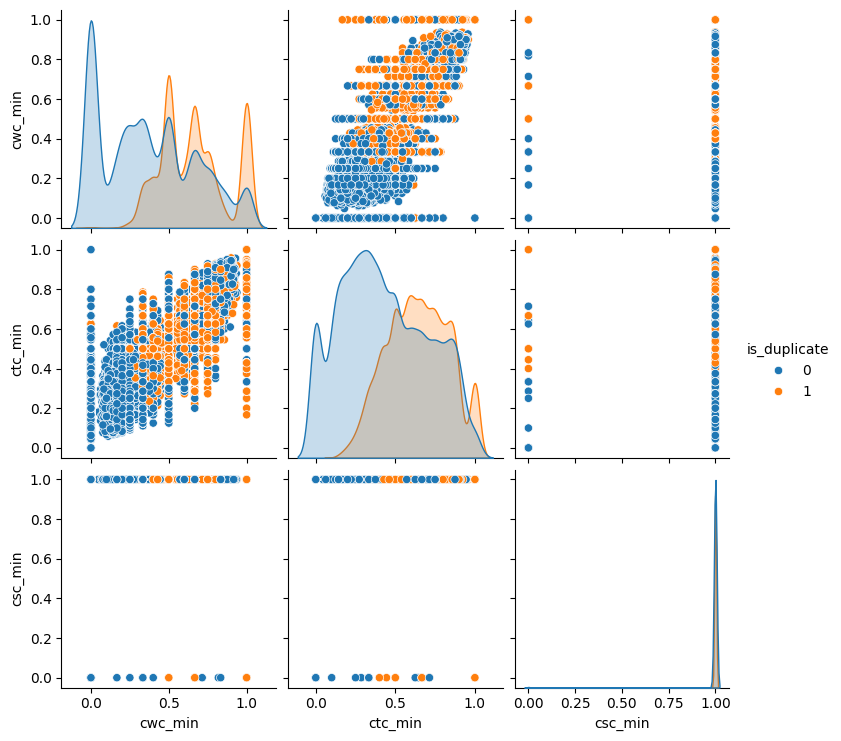

In [ ]:
sns.pairplot(new_data[['cwc_min','ctc_min' , 'csc_min' , 'is_duplicate'  ]] , hue='is_duplicate')

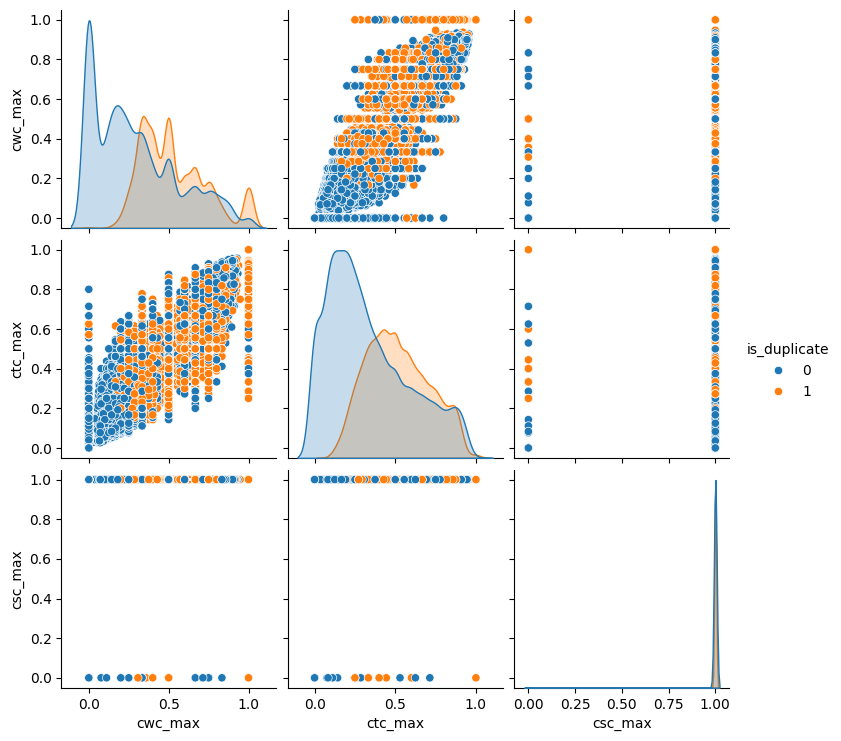

In [ ]:
sns.pairplot(new_data[['cwc_max','ctc_max' , 'csc_max' , 'is_duplicate'  ]] , hue='is_duplicate')

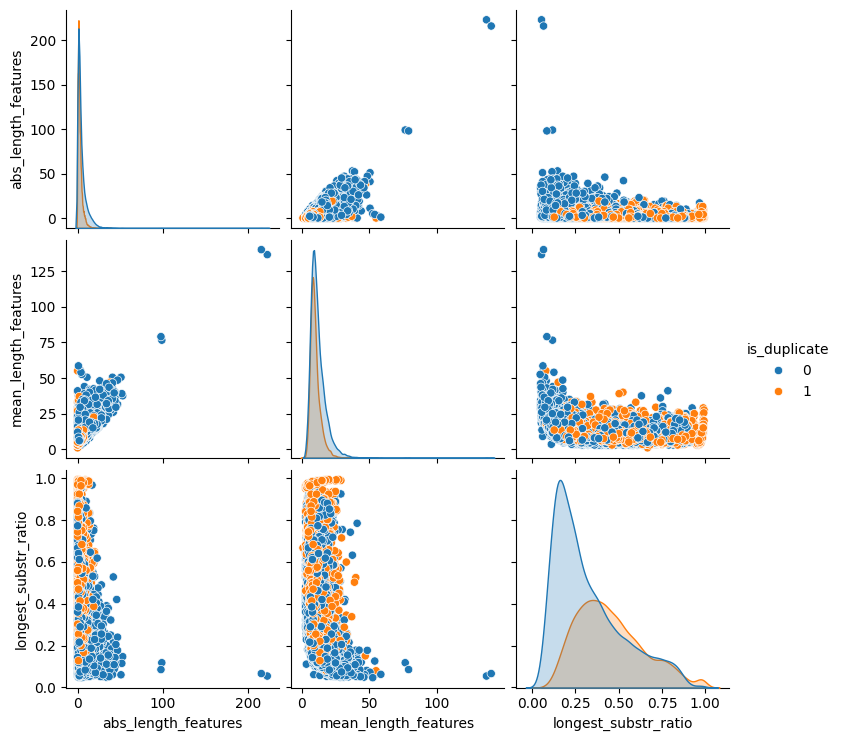

In [ ]:
sns.pairplot(new_data[['abs_length_features' ,'mean_length_features' , 'longest_substr_ratio', 'is_duplicate']], hue = 'is_duplicate')

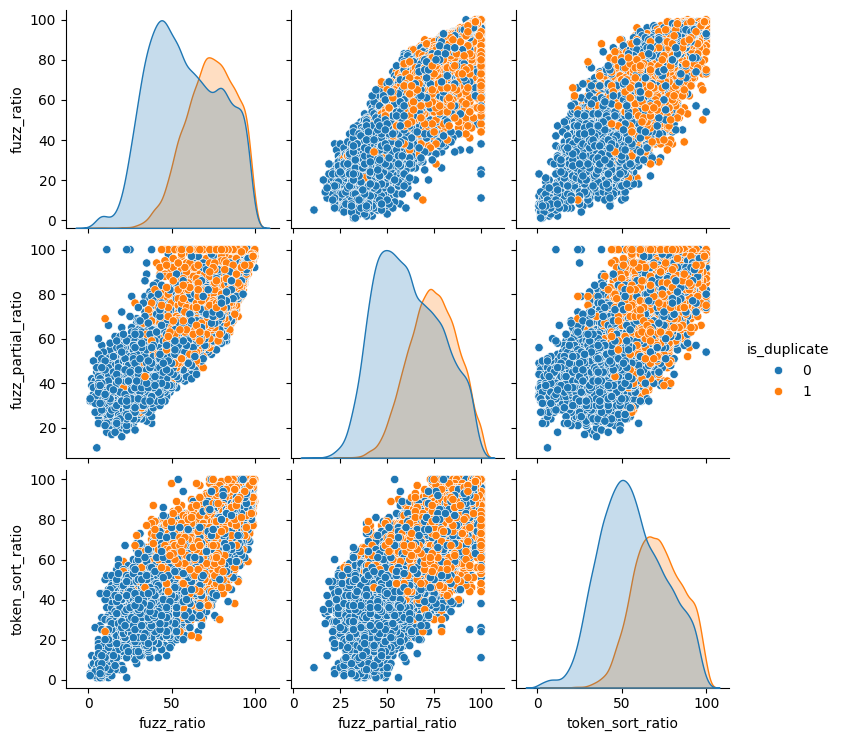

In [ ]:
sns.pairplot(new_data[['fuzz_ratio' ,'fuzz_partial_ratio' , 'token_sort_ratio', 'is_duplicate']], hue = 'is_duplicate')

In [ ]:
#new data frame
ques_df = new_data[['question1','question2']]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_pdf1 = pd.DataFrame(q1_arr,index = new_data.index)
temp_pdf2 = pd.DataFrame(q2_arr,index = new_data.index)
temp_pdf = pd.concat([temp_pdf1,temp_pdf2],axis = 1)
temp_pdf.shape

(30000, 6000)

In [ ]:
temp_pdf['is_duplicate'] = new_data['is_duplicate']

In [ ]:
temp_pdf


,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
192919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
134970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
302506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
341114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
249074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
393079,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
safe_df = new_data.drop(columns = ['id','qid1','qid2','question1','question2'])

In [ ]:
safe_df

,is_duplicate,word_total,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_share,cwc_min,cwc_max,...,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_length_features,mean_length_features,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio
192919,1,14,42,42,7,7,5,0.36,0.666644,0.666644,...,0.714276,0.714276,1,1,0,7.0,0.604651,83,83,83
134970,0,17,56,41,10,7,4,0.24,0.666644,0.285710,...,0.571420,0.399996,0,1,3,8.5,0.285714,70,68,63
74518,0,26,66,107,10,16,3,0.12,0.000000,0.000000,...,0.299997,0.187499,0,0,6,13.0,0.179104,24,48,52
302506,0,16,63,37,10,6,3,0.19,0.000000,0.000000,...,0.499992,0.299997,0,1,4,8.0,0.210526,60,54,65
341114,1,23,92,59,13,10,6,0.26,0.499992,0.374995,...,0.599994,0.461535,0,1,3,11.5,0.500000,70,73,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398780,1,26,97,85,14,13,6,0.23,0.428565,0.374995,...,0.461535,0.428568,0,1,1,13.5,0.127907,56,51,69
249074,0,23,82,78,12,12,9,0.39,0.833319,0.833319,...,0.749994,0.749994,1,0,0,12.0,0.772152,86,86,82
393079,0,27,149,49,24,6,4,0.15,0.599988,0.249998,...,0.666656,0.166666,0,0,18,15.0,0.420000,30,74,40
259806,0,17,56,59,9,8,0,0.00,0.000000,0.000000,...,0.000000,0.000000,0,0,1,8.5,0.210526,45,49,51


In [ ]:
final_df = pd.concat([safe_df,temp_pdf],axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(final_df.iloc[: , 1:].values,final_df.iloc[: ,0].values, test_size = 0.2,random_state = 1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rm = RandomForestClassifier()
rm.fit(x_train,y_train)
y_predict = rm.predict(x_test)
accuracy_score(y_test,y_predict)

0.991

In [ ]:

from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train,y_train)
y_predictxg = xg.predict(x_test)
accuracy_score(y_test,y_predictxg)

1.0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3761
           1       1.00      0.99      0.99      2239

    accuracy                           1.00      6000
   macro avg       1.00      0.99      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [ ]:
from sklearn.metrics import confusion_matrix  # Corrected the module name to sklearn.metrics
confusion_matrix(y_test,y_predict)

array([[3753,    8],
       [  46, 2193]])

In [ ]:
from sklearn.metrics import accuracy_score

train_pred = rm.predict(x_train)
test_pred = rm.predict(x_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")


Train Accuracy: 1.0
Test Accuracy: 0.991


In [ ]:
import joblib

# Save the model
joblib.dump(rm, 'random_forest_model.pkl')

# Load the model
# loaded_model = joblib.load('random_forest_model.pkl')


['random_forest_model.pkl']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Train the model
log_model = LogisticRegression(max_iter=1000)  # use more iterations if needed
log_model.fit(x_train, y_train)

# Step 2: Predict on test data
y_pred_log = log_model.predict(x_test)

# Step 3: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3761
           1       1.00      1.00      1.00      2239

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000


Confusion Matrix:
 [[3761    0]
 [   0 2239]]


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_model, x_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


In [ ]:
final_df.shape

(30000, 6023)